In [6]:
import baostock as bs
import pandas as pd
import mplfinance as mpf

# 登录baostock系统
lg = bs.login()

# 设置股票代码和时间范围
stock_code = "sh.000001"  # 上证指数
start_date = "2024-01-01"
end_date = "2024-12-31"

# 获取股票数据
rs = bs.query_history_k_data(stock_code,
                              "date,open,high,low,close,volume",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 登出baostock系统
bs.logout()

# 创建DataFrame
df = data[['date', 'open', 'high', 'low', 'close', 'volume']].rename(columns={'date': 'Date'})

# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # 设置日期列为索引



login success!
logout success!


In [7]:
# 将股价数据转换为数值类型
df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)

df 

# 设置蜡烛图数据
ohlc = df[['open', 'high', 'low', 'close','volume']]


['binance', 'binancedark', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'tradingview', 'yahoo']


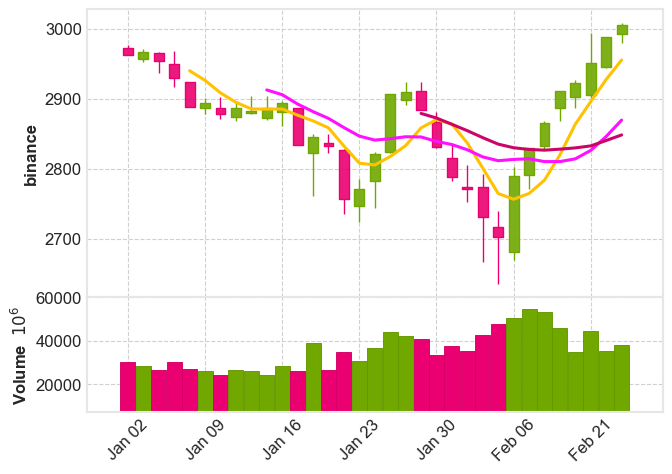

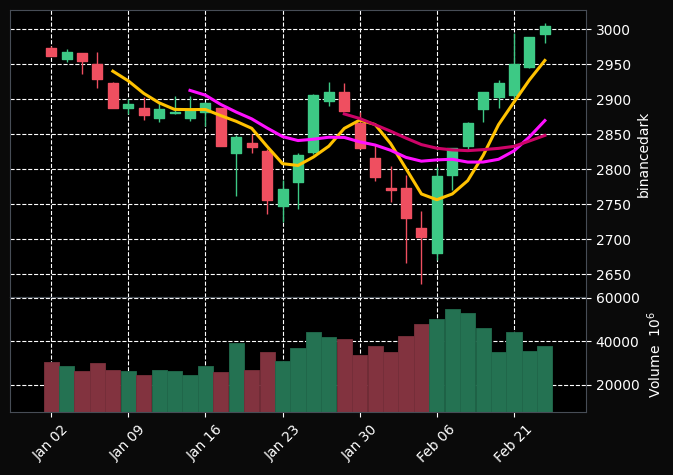

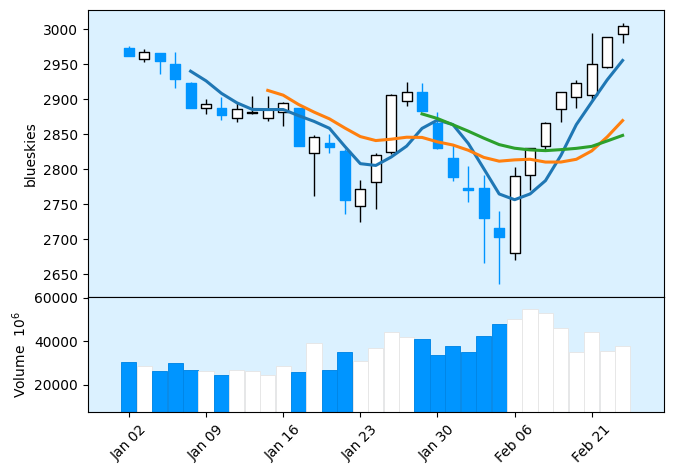

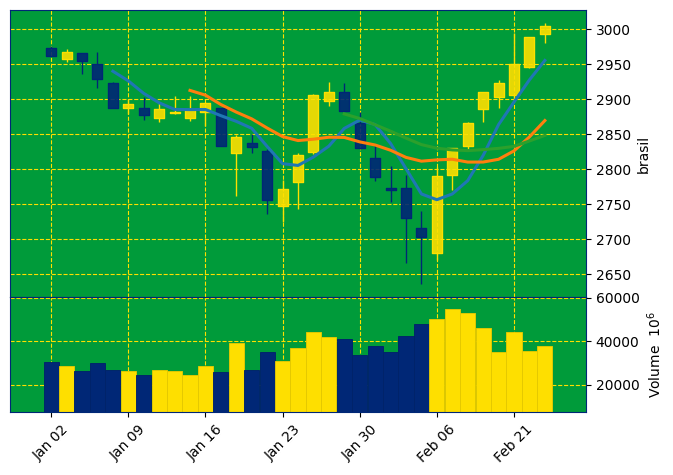

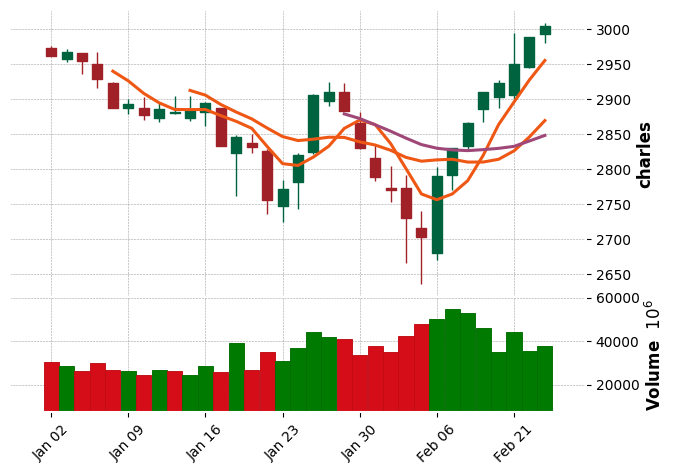

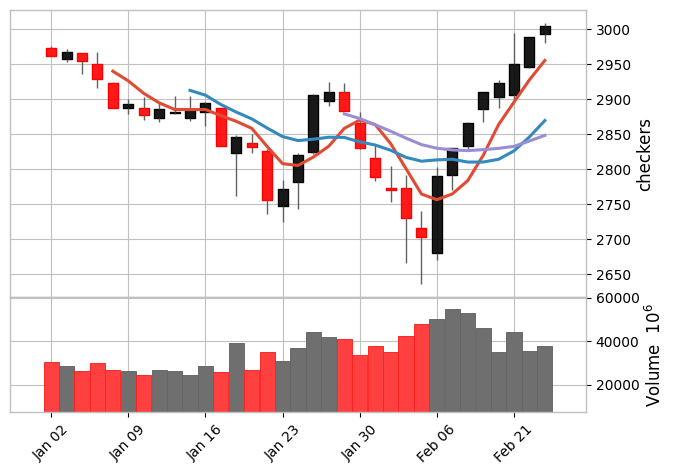

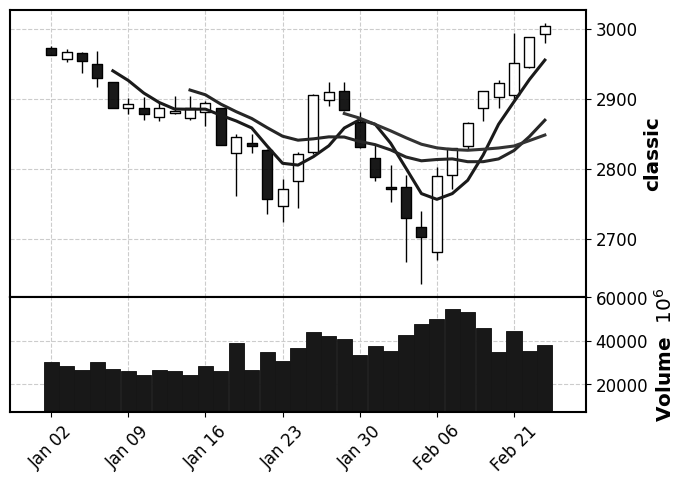

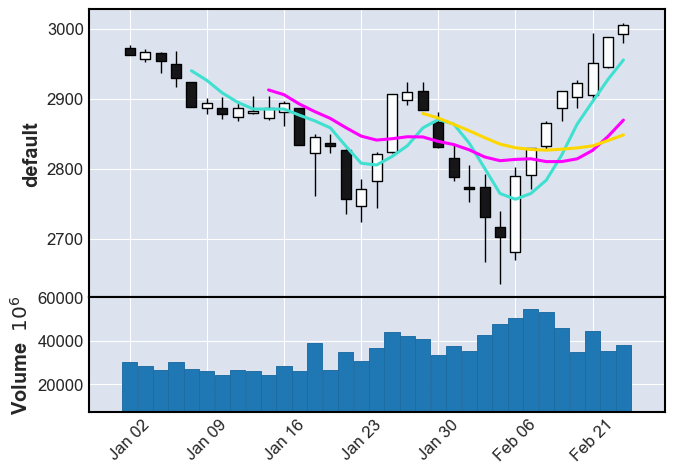

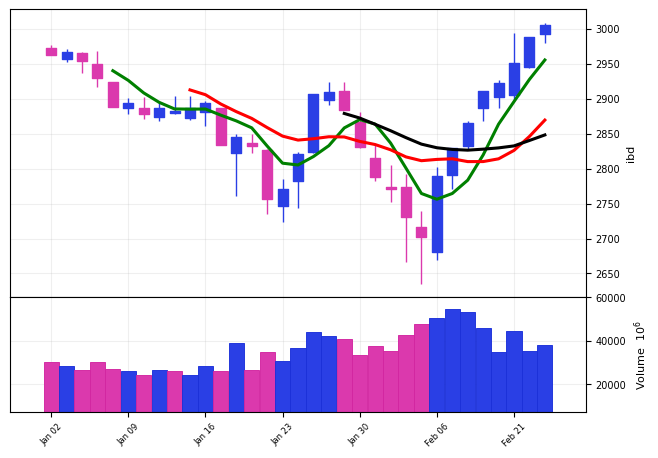

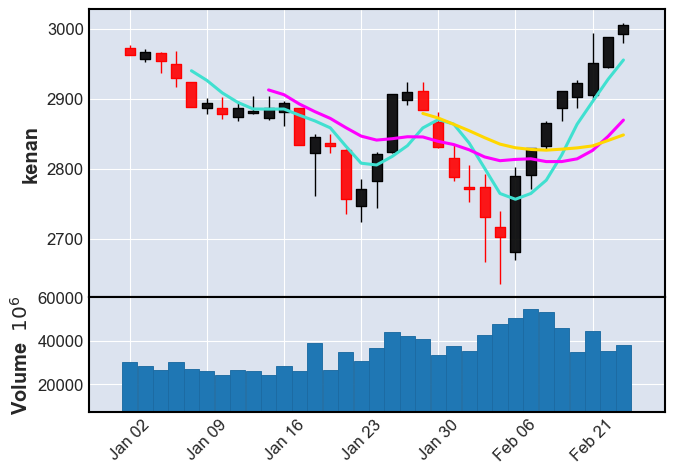

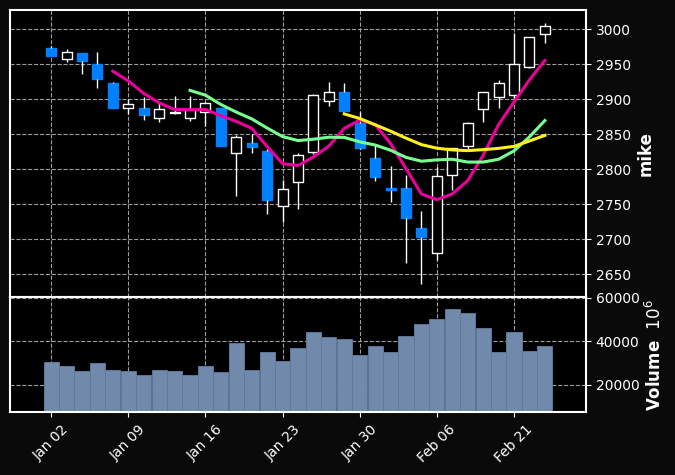

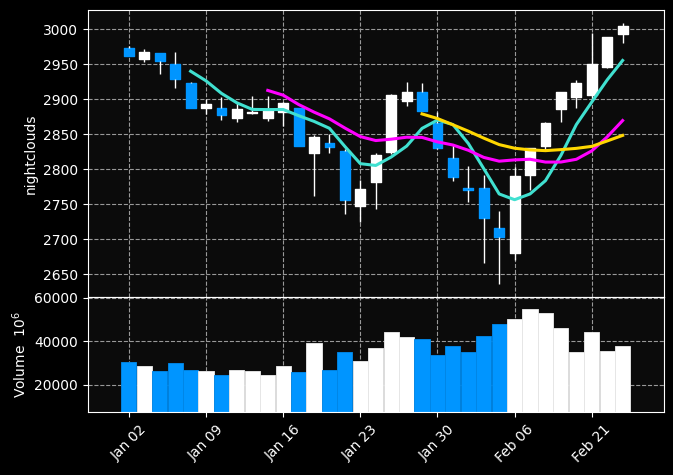

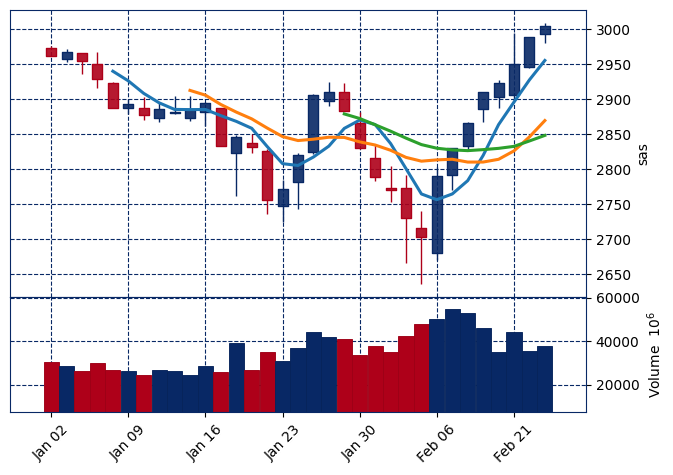

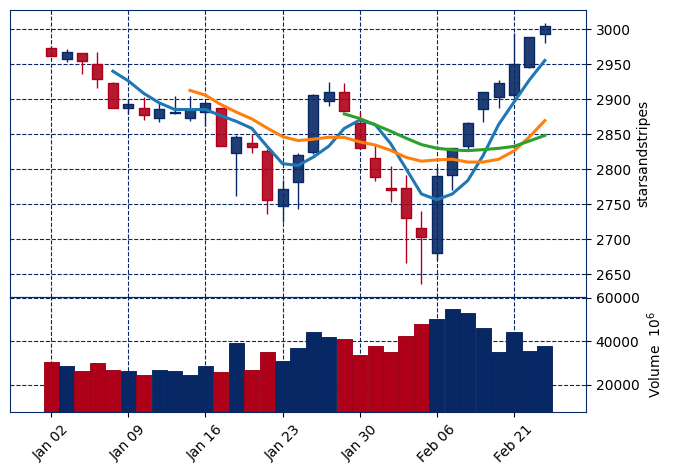

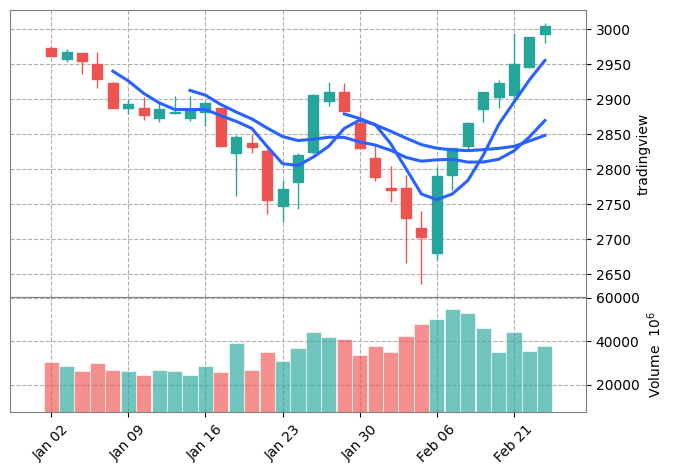

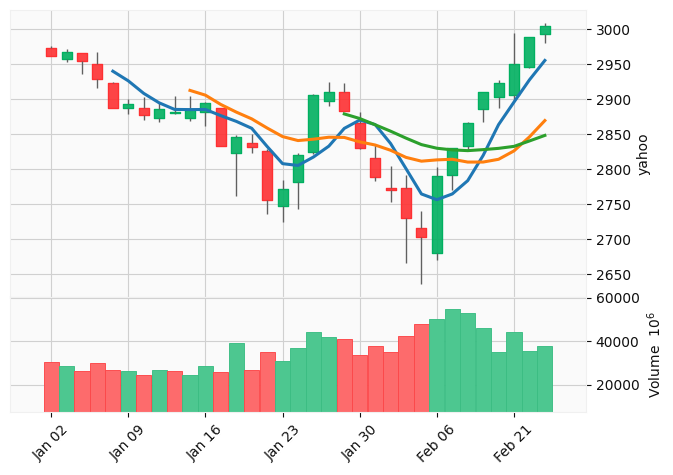

In [10]:
# 获取可以用的K线类型
styples = mpf.available_styles()
print(styples)

for stple in styples:
    # 绘制蜡烛图
    mpf.plot(ohlc, type='candle', style=stple, mav=(5,10,20), volume=True,  ylabel=stple)

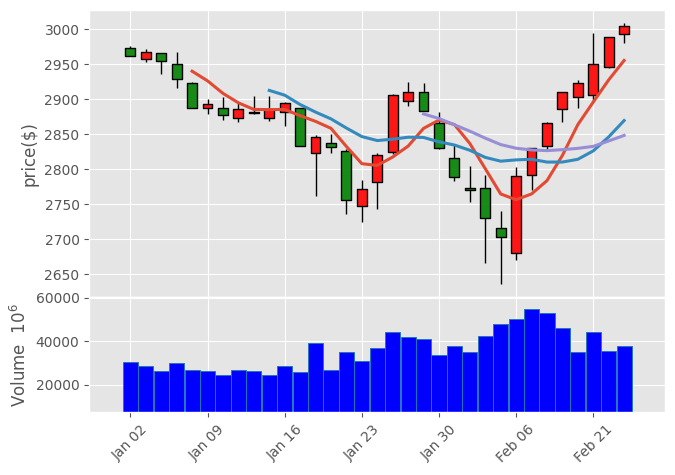

In [9]:

# 调用make_marketcolors函数，定义K线颜色
mc = mpf.make_marketcolors(
    up="red",  # 上涨K线的颜色
    down="green",  # 下跌K线的颜色
    edge="black",  # 蜡烛图箱体的颜色
    volume="blue",  # 成交量柱子的颜色
    wick="black"  # 蜡烛图影线的颜色
)
# 调用make_mpf_style函数，自定义图表样式
# 函数返回一个字典，查看字典包含的数据，按照需求和规范调整参数
style = mpf.make_mpf_style(base_mpl_style="ggplot", marketcolors=mc)
# print(style)

# 绘制蜡烛图
mpf.plot(ohlc, type='candle', style=style, mav=(5,10,20), volume=True,  ylabel="price($)")